## Description
Visualisation of $ f = \Sigma R_{n}*e^{i*(\omega_{n}*t + \phi_{n})}$ as parametric plot $(Re(f),Im(f))$ <br/>
In file there are table of real values $R_{n}, \omega_{n}, \phi_{n}$, in that order, n increase with row number <br/>

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import re

In [229]:
class point2d:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __add__(self,p):
        self.x += p.x
        self.y += p.y
        return self
    
    def rotate(self,alpha):
        x_1 = self.x*np.cos(alpha) - self.y*np.sin(alpha)
        y_1 = self.x*np.sin(alpha) + self.y*np.cos(alpha)
        
        self.x = x_1
        self.y = y_1
        
        return self
    
class radious:
    def __init__(self,r,s,phi):
        self.r = r
        self.s = s
        self.phi = phi
        self.p = point2d(0,r).rotate(phi)
        
    def __add__(self,r):
        self.p = self.p + r.p
        return self

class fvst:
    def __init__(self,filename):
        self.vectors = []
        self.trace = []
        
        with open(filename, "r") as f:
            for line in f:
                tmp = line.strip().split(' ')
                if len(tmp) == 3:
                    print "%s %s %s"%(tmp[0],tmp[1],tmp[2])
                    r = float(tmp[0])
                    s = float(tmp[1])
                    p = float(tmp[2])
                    self.vectors.append(radious(r,s,p))
                
        n = len(self.vectors)
        self.n = n
        
        tmp = point2d(0.0,0.0)
        for i in xrange(0,n):
            tmp = tmp + self.vectors[i].p
            
        self.trace.append((tmp.x,tmp.y))
        
    def run(self,t,dt):
        if np.fabs(dt) < 10e-6 or t < 0.0:
            print "Wrong parameters!"
            return
        
        n_iter = int(float(t)/dt) + 1
        for i in xrange(0,n_iter):
            tmp = point2d(0.0,0.0) 
            for j in xrange(0, self.n):
                alpha = self.vectors[j].s * dt
                self.vectors[j].p = self.vectors[j].p.rotate(alpha)
                tmp = tmp + self.vectors[j].p
            
            self.trace.append((tmp.x,tmp.y))
            
    def plot(self,*args,**kwargs):
        x = [i[0] for i in self.trace]
        y = [i[1] for i in self.trace]
        
        x_max = max(x) + 0.25
        x_min = min(x) - 0.25
        y_max = max(y) + 0.25
        y_min = min(y) - 0.25
        
        pl.xlim([x_min,x_max])
        pl.ylim([y_min,y_max])
        
        pl.plot(x,y,*args,**kwargs)
        pl.show()
        
    def plot_func(self,t,dt,*args,**kwargs):
        x = np.linspace(0,t,int(t/dt))
        y = [sum([j.r*np.sin(i*j.s + j.phi) for j in self.vectors]) for i in x]
        pl.plot(x,y,*args,**kwargs)
        pl.show()

1.0 0.0 0.0
-0.5 -0.2 1.0
0.5 2.0 0.5


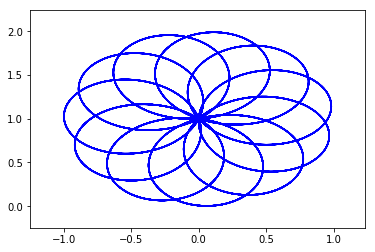

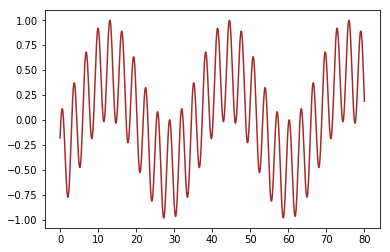

In [241]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=80,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 0.20 1.0
0.25 2.0 0.3


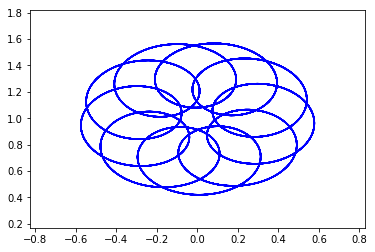

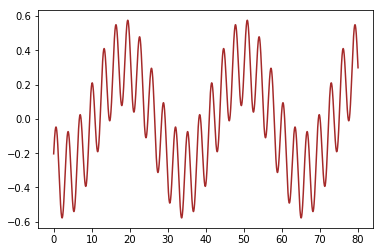

In [240]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=80,dt=0.01,color="brown")

1.0 0.0 0.0
-0.5 -0.2 1.0
0.25 5.0 0.5
0.25 0.0 0.75
0.5 -5.0 0.0


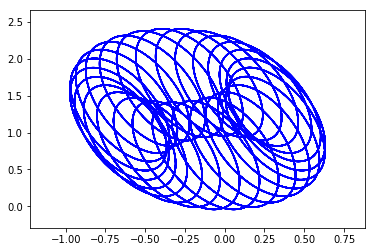

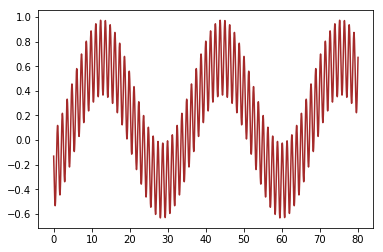

In [239]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=80,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 0.20 1.0
0.25 2.0 0.5
1 -0.5 0.5


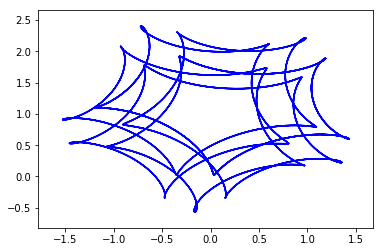

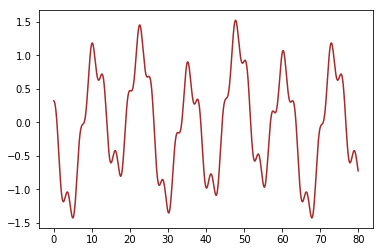

In [237]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=80,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 0.20 1.0
0.25 2.0 0.5
0.7 0.5 0.5


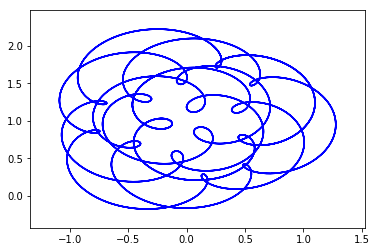

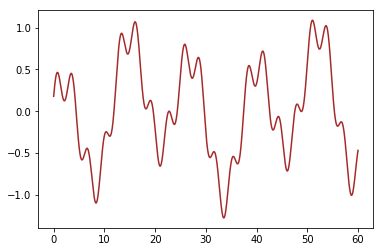

In [234]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")

1.0 0.0 0.0
-0.5 -0.2 1.0
0.25 2.0 0.5
0.25 0.0 0.75
0.5 -1.0 0.0


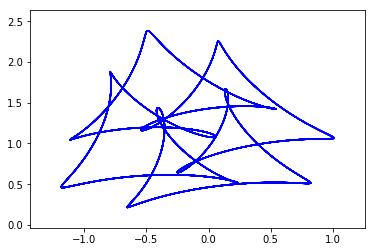

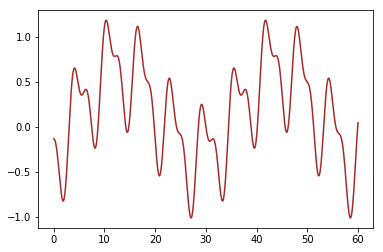

In [233]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")

1.0 0.0 0.0
-0.5 -0.5 0.0
0.25 5.0 0.0
0.25 0.0 0.0
0.25 -2.0 0.0


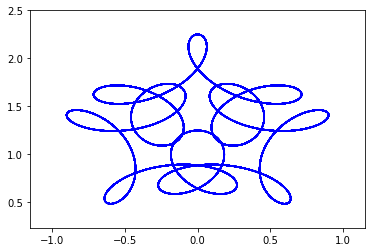

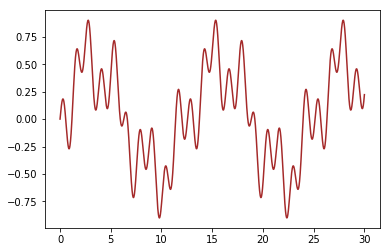

In [230]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=30,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 0.70 1.0
0.25 -1.0 0.5
0.7 0.7 0.5


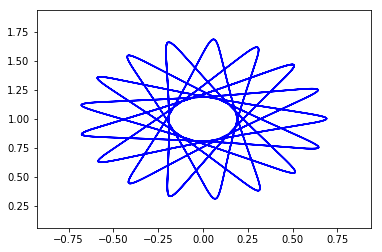

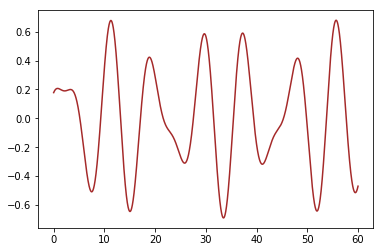

In [246]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 0.70 1.0
0.25 -1.0 0.5
0.33 0.7 0.5


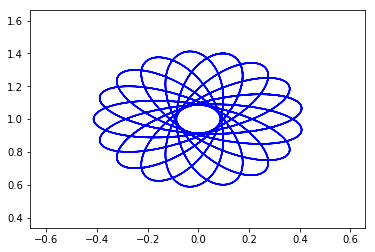

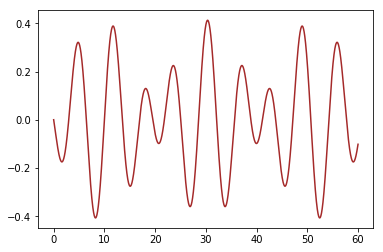

In [250]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 -0.70 0.5
0.66 2.0 0.5
-0.33 -0.7 -0.0


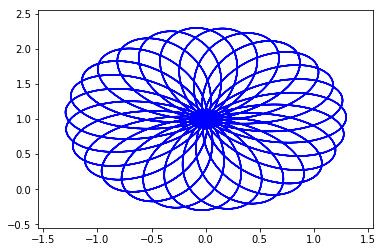

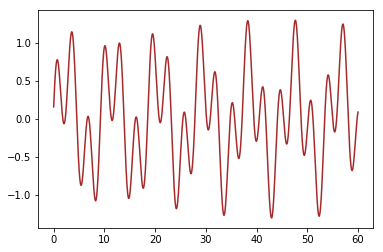

In [258]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")

1.0 0.0 0.0
-0.33 -0.70 0.5
0.66 2.0 0.5
-0.33 -0.7 -0.5
0.66 -2.0 0.5


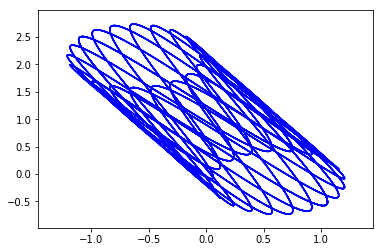

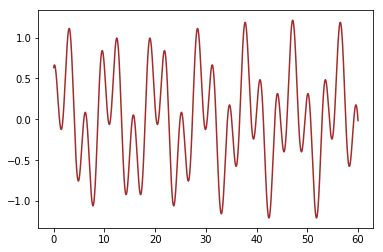

In [260]:
a = fvst("init.conf")
a.run(200,0.01)
a.plot(color="blue")
a.plot_func(t=60,dt=0.01,color="brown")